In [1]:
import pandas as pd
import numpy as np

In [3]:
df_ = pd.read_csv("persona.csv")
df = df_.copy()
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [4]:
print("----- Index -----")
print(df.index)

print("----- Shape -----")
print(df.shape)

print("----- Types -----")
print(df.dtypes)

print("----- Describe -----")
print(df.describe().T)

----- Index -----
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', length=5000)
----- Shape -----
(5000, 5)
----- Types -----
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
----- Describe -----
        count     mean        std   min   25%   50%   75%   max
PRICE  5000.0  34.1320  12.464897   9.0  29.0  39.0  39.0  59.0
AGE    5000.0  23.5814   8.995908  15.0  17.0  21.0  27.0  66.0


In [5]:
df.pivot_table(values="PRICE", index="SOURCE", columns="COUNTRY")

COUNTRY,bra,can,deu,fra,tur,usa
SOURCE,,,,,,
android,34.387029,33.330709,33.869888,34.312500,36.229437,33.760357
ios,34.222222,33.951456,34.268817,32.776224,33.272727,34.371703


In [6]:
agg_df = df

bins = [0,10,23,30,40, agg_df["AGE"].max()]
mylabels = ['0_18','19_23','24_30','31_40','40_' + str(agg_df["AGE"].max())]

agg_df["cat_age"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)
agg_df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,cat_age
0,39,android,male,bra,17,19_23
1,39,android,male,bra,17,19_23
2,49,android,male,bra,17,19_23
3,29,android,male,tur,17,19_23
4,49,android,male,tur,17,19_23


In [11]:
agg_df = df

cols = [i for i in agg_df.columns if i not in ["PRICE","AGE"]]
agg_df["customers_level_based"] = ["_".join(i) for i in agg_df[cols].values]
agg_df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,cat_age,customers_level_based
0,39,android,male,bra,17,19_23,android_male_bra_19_23
1,39,android,male,bra,17,19_23,android_male_bra_19_23
2,49,android,male,bra,17,19_23,android_male_bra_19_23
3,29,android,male,tur,17,19_23,android_male_tur_19_23
4,49,android,male,tur,17,19_23,android_male_tur_19_23


In [13]:
from sklearn import preprocessing

In [15]:
agg_df = df

agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 3, labels=["C","B","A"], duplicates='drop')

In [16]:
agg_df = df
agg_df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,cat_age,customers_level_based,SEGMENT
0,39,android,male,bra,17,19_23,android_male_bra_19_23,B
1,39,android,male,bra,17,19_23,android_male_bra_19_23,B
2,49,android,male,bra,17,19_23,android_male_bra_19_23,A
3,29,android,male,tur,17,19_23,android_male_tur_19_23,C
4,49,android,male,tur,17,19_23,android_male_tur_19_23,A


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

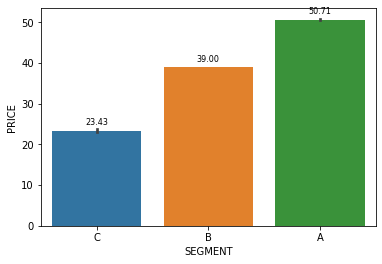

In [19]:
# Demonstrating segments as bars on a chart, where the length of each bar varies based on the value of the customer profile
   
plot = sns.barplot(x="SEGMENT", y="PRICE", data=agg_df)

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
             (bar.get_x() + bar.get_width() / 2,
             bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                      textcoords='offset points')